In [1]:
import pandas as pd

# Load the dataset
file_path = "amazon.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

(None,
    product_id                                       product_name  \
 0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
 1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
 2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
 3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
 4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
 
                                             category discounted_price  \
 0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
 1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
 2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
 3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
 4  Computers&Accessories|Accessories&Peripherals|...             ₹154   
 
   actual_price discount_percentage rating rating_count  \
 0       ₹1,099                 64%    4.2       24,269   
 1         ₹3

In [3]:
import numpy as np

# Function to clean price columns (remove ₹ and convert to float)
def clean_price(price):
    return float(price.replace("₹", "").replace(",", "").strip()) if isinstance(price, str) else np.nan

# Apply cleaning to price-related columns
df["discounted_price"] = df["discounted_price"].apply(clean_price)
df["actual_price"] = df["actual_price"].apply(clean_price)

# Convert discount percentage to numeric (remove % sign)
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype(float)

# Convert rating and rating count to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating_count"] = df["rating_count"].str.replace(",", "").astype(float)

# Extract top-level category (first category before the "|")
df["main_category"] = df["category"].apply(lambda x: x.split("|")[0] if isinstance(x, str) else np.nan)

# Display cleaned dataset info
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

(None,
    product_id                                       product_name  \
 0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
 1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
 2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
 3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
 4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
 
                                             category  discounted_price  \
 0  Computers&Accessories|Accessories&Peripherals|...             399.0   
 1  Computers&Accessories|Accessories&Peripherals|...             199.0   
 2  Computers&Accessories|Accessories&Peripherals|...             199.0   
 3  Computers&Accessories|Accessories&Peripherals|...             329.0   
 4  Computers&Accessories|Accessories&Peripherals|...             154.0   
 
    actual_price  discount_percentage  rating  rating_count  \
 0        1099.0                 64.0     4.2       24269.0   

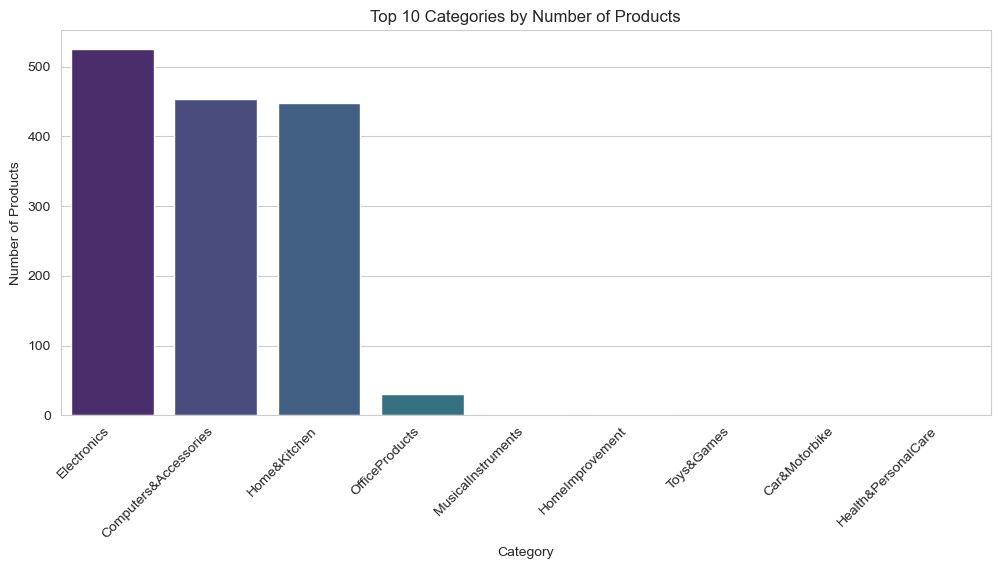

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Top 10 categories by product count
top_categories = df["main_category"].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Top 10 Categories by Number of Products")
plt.show()


In [9]:
# Check for non-numeric values in price columns
df[~df["actual_price"].apply(lambda x: isinstance(x, (int, float)))][["actual_price", "discounted_price"]]


,actual_price,discounted_price


In [13]:
# Identify non-numeric values in price columns
non_numeric_actual = df[~df["actual_price"].apply(lambda x: isinstance(x, (int, float)))]
non_numeric_discounted = df[~df["discounted_price"].apply(lambda x: isinstance(x, (int, float)))]

non_numeric_actual[["actual_price"]], non_numeric_discounted[["discounted_price"]]


(Empty DataFrame
 Columns: [actual_price]
 Index: [],
 Empty DataFrame
 Columns: [discounted_price]
 Index: [])

C:\Users\naris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


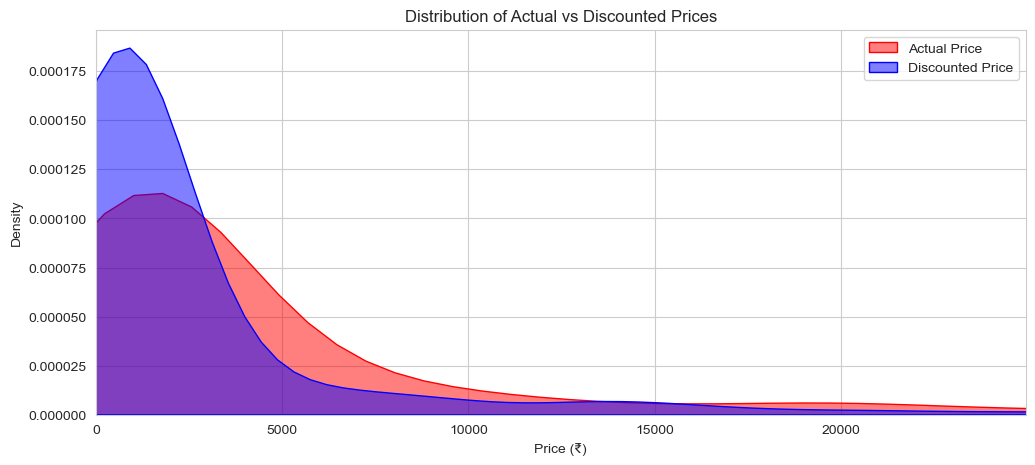

In [15]:
# Check for NaN or infinite values
df_clean = df.dropna(subset=["actual_price", "discounted_price"])
df_clean = df_clean[np.isfinite(df_clean["actual_price"]) & np.isfinite(df_clean["discounted_price"])]

# Reattempt price distribution plot
plt.figure(figsize=(12, 5))
sns.kdeplot(df_clean["actual_price"], fill=True, color="red", label="Actual Price", alpha=0.5)
sns.kdeplot(df_clean["discounted_price"], fill=True, color="blue", label="Discounted Price", alpha=0.5)
plt.xlim(0, df_clean["actual_price"].quantile(0.95))  # Limit x-axis to avoid extreme outliers
plt.xlabel("Price (₹)")
plt.ylabel("Density")
plt.title("Distribution of Actual vs Discounted Prices")
plt.legend()
plt.show()


In [19]:
# Check data types again
df.dtypes

# Identify any remaining non-numeric values in the price columns
df[["actual_price", "discounted_price"]].applymap(lambda x: type(x))


C:\Users\naris\AppData\Local\Temp\ipykernel_31672\1873910464.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["actual_price", "discounted_price"]].applymap(lambda x: type(x))


,actual_price,discounted_price
0,<class 'float'>,<class 'float'>
1,<class 'float'>,<class 'float'>
2,<class 'float'>,<class 'float'>
3,<class 'float'>,<class 'float'>
4,<class 'float'>,<class 'float'>
...,...,...
1460,<class 'float'>,<class 'float'>
1461,<class 'float'>,<class 'float'>
1462,<class 'float'>,<class 'float'>
1463,<class 'float'>,<class 'float'>


In [21]:
# Top 10 highest discounted products
top_discounts = df.nlargest(10, "discount_percentage")[["product_name", "discount_percentage", "actual_price", "discounted_price"]]

# Display top discounted products
top_discounts


,product_name,discount_percentage,actual_price,discounted_price
695,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",94.0,4999.0,294.0
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91.0,19999.0,1799.0
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91.0,19999.0,1799.0
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91.0,19999.0,1799.0
372,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91.0,19999.0,1799.0
380,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",91.0,19999.0,1799.0
2,Sounce Fast Phone Charging Cable & Data Sync U...,90.0,1899.0,199.0
407,Sounce Spiral Charger Cable Protector Data Cab...,90.0,999.0,99.0
542,Sounce Protective Case Cover Compatible Boat X...,90.0,1899.0,199.0
557,LAPSTER 12pcs Spiral Cable Protectors for Char...,90.0,999.0,99.0


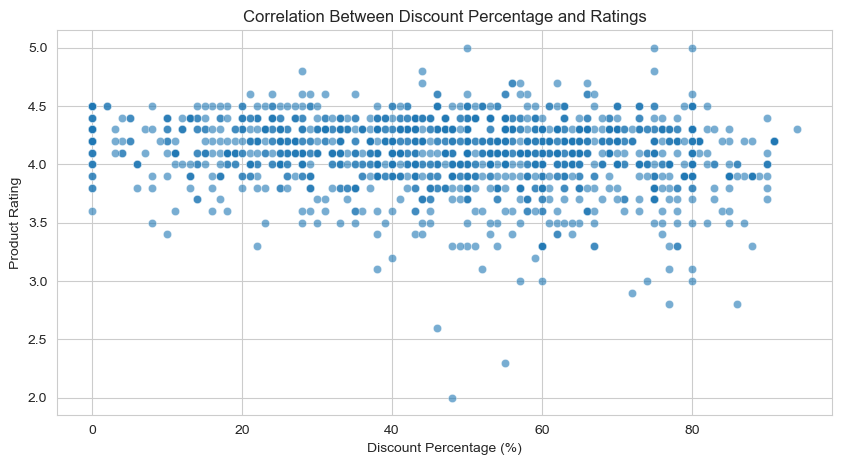

In [23]:
# Correlation between discount percentage and rating
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["discount_percentage"], y=df["rating"], alpha=0.6)
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Product Rating")
plt.title("Correlation Between Discount Percentage and Ratings")
plt.show()


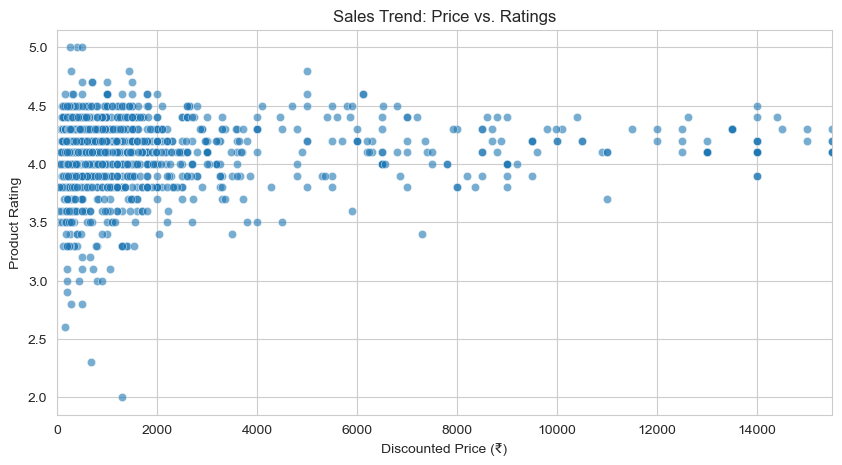

In [25]:
# Sales trend: Relationship between price and ratings
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["discounted_price"], y=df["rating"], alpha=0.6)
plt.xlim(0, df["discounted_price"].quantile(0.95))  # Limit x-axis to remove extreme outliers
plt.xlabel("Discounted Price (₹)")
plt.ylabel("Product Rating")
plt.title("Sales Trend: Price vs. Ratings")
plt.show()
